# Libraries

In [1]:
import numpy as np
import pandas as pd
import scipy
import scipy.stats as st

# Importing data

In [2]:
col = ['date','result']
data = pd.read_excel('./data/data.xlsx',header=None)

data.columns = col

# Quick look

In [199]:
data

,date,result,year,month,day,period,c_mean,c_sum
0,2018-02-04,0.76,2018,2,4,1,0.760000,0.76
1,2018-02-11,0.50,2018,2,11,1,0.630000,1.26
2,2018-02-18,0.47,2018,2,18,1,0.576667,1.73
3,2018-03-04,0.76,2018,3,4,1,0.622500,2.49
4,2018-03-11,0.52,2018,3,11,1,0.602000,3.01
...,...,...,...,...,...,...,...,...
153,2021-04-05,-1.00,2021,4,5,4,0.120390,18.54
154,2021-04-07,-1.00,2021,4,7,4,0.113161,17.54
155,2021-04-14,-1.00,2021,4,14,4,0.106026,16.54
156,2021-04-16,0.65,2021,4,16,4,0.109490,17.19


In [200]:
data[:].describe()

,result,year,month,day,period,c_mean,c_sum
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,0.102468,2019.379747,5.468354,14.879747,2.696203,0.170881,11.558544
std,0.714591,1.062431,4.187745,8.526734,0.962407,0.104765,6.290563
min,-1.000000,2018.000000,1.000000,1.000000,1.000000,0.081389,0.760000
25%,-1.000000,2019.000000,2.000000,8.000000,2.000000,0.137833,4.417500
50%,0.350000,2019.000000,4.000000,14.000000,2.000000,0.147805,12.145000
75%,0.470000,2020.000000,11.000000,22.000000,4.000000,0.158280,17.242500
max,2.050000,2021.000000,12.000000,31.000000,4.000000,0.760000,22.540000


# Data cleaning

## Ordering

In [3]:
data = data.sort_values(['date','day']).reset_index()

KeyError: 'day'

In [4]:
data.drop(columns=['index'],inplace=True)

KeyError: "['index'] not found in axis"

## Splitting date

In [5]:
dates = data['date']

data['year'] = dates.apply(lambda x: x.year)
data['month'] = dates.apply(lambda x: x.month)
data['day'] = dates.apply(lambda x: x.day)

In [6]:
data.groupby(['year','month']).agg(np.mean)

result        day
year month                     
2018 2      0.576667  11.000000
     3      0.587500  16.500000
     4     -0.325000  10.500000
     5     -1.000000  12.000000
     10     0.250000  21.000000
     11     0.306667  16.777778
     12    -0.063077  16.692308
2019 1      0.073000  20.300000
     2      0.456000  11.000000
     3      0.287692  19.692308
     4      0.195556  14.555556
     5     -0.200000  11.571429
     6      0.067500   5.250000
     10     0.583333  23.666667
     11     0.190769  13.923077
     12    -1.000000   8.500000
2020 1      0.120000  16.250000
     2      0.353750  13.625000
     3      0.320000  12.000000
     10     0.400000   8.000000
     11     0.300000  15.000000
     12    -0.028571  16.428571
2021 1      0.129167  16.583333
     2      0.117143  11.571429
     3     -0.104000  12.900000
     4     -0.357143   9.857143

In [7]:
data['Month'] = '0'

data.loc[data['month']==1,'Month'] = 'Jan'
data.loc[data['month']==2,'Month'] = 'Feb'
data.loc[data['month']==3,'Month'] = 'Mar'
data.loc[data['month']==4,'Month'] = 'Apr'
data.loc[data['month']==5,'Month'] = 'May'
data.loc[data['month']==6,'Month'] = 'Jun'
data.loc[data['month']==10,'Month'] = 'Oct'
data.loc[data['month']==11,'Month'] = 'Nov'
data.loc[data['month']==12,'Month'] = 'Dec'

data

,date,result,year,month,day,Month
0,2018-05-12,-1.00,2018,5,12,May
1,2018-02-04,0.76,2018,2,4,Feb
2,2018-02-11,0.50,2018,2,11,Feb
3,2018-02-18,0.47,2018,2,18,Feb
4,2018-03-04,0.76,2018,3,4,Mar
...,...,...,...,...,...,...
153,2021-04-05,-1.00,2021,4,5,Apr
154,2021-04-07,-1.00,2021,4,7,Apr
155,2021-04-14,-1.00,2021,4,14,Apr
156,2021-04-16,0.65,2021,4,16,Apr


## Creating periods

In [8]:
data['period'] = 0
data['period'].astype(int)

#Period 1
data.loc[(data['year']==2018) & (data['month']<7),'period']=int(1)

#Period 2
data.loc[(data['year']==2018) & (data['month']>7),'period']=2
data.loc[(data['year']==2019) & (data['month']<7),'period']=2

#Period 3
data.loc[(data['year']==2019) & (data['month']>7),'period']=3
data.loc[(data['year']==2020) & (data['month']<7),'period']=3

#Period 4
data.loc[(data['year']==2020) & (data['month']>7),'period']=4
data.loc[(data['year']==2021) & (data['month']<7),'period']=4


data

,date,result,year,month,day,Month,period
0,2018-05-12,-1.00,2018,5,12,May,1
1,2018-02-04,0.76,2018,2,4,Feb,1
2,2018-02-11,0.50,2018,2,11,Feb,1
3,2018-02-18,0.47,2018,2,18,Feb,1
4,2018-03-04,0.76,2018,3,4,Mar,1
...,...,...,...,...,...,...,...
153,2021-04-05,-1.00,2021,4,5,Apr,4
154,2021-04-07,-1.00,2021,4,7,Apr,4
155,2021-04-14,-1.00,2021,4,14,Apr,4
156,2021-04-16,0.65,2021,4,16,Apr,4


## Cumulative sum and average

In [9]:

i = 0
c_mean = []
c_sum = []

for row in data['result']:
    
    if len(c_sum)==0:
        c_sum.append(row)
        c_mean.append(row)
    else:
        c_sum.append(row + c_sum[i-1])
        c_mean.append(row/(i+1) + c_mean[i-1]*i/(i+1))
    
    i += 1

data['c_mean'] = c_mean
data['c_sum'] = c_sum
data

,date,result,year,month,day,Month,period,c_mean,c_sum
0,2018-05-12,-1.00,2018,5,12,May,1,-1.000000,-1.00
1,2018-02-04,0.76,2018,2,4,Feb,1,-0.120000,-0.24
2,2018-02-11,0.50,2018,2,11,Feb,1,0.086667,0.26
3,2018-02-18,0.47,2018,2,18,Feb,1,0.182500,0.73
4,2018-03-04,0.76,2018,3,4,Mar,1,0.298000,1.49
...,...,...,...,...,...,...,...,...,...
153,2021-04-05,-1.00,2021,4,5,Apr,4,0.120390,18.54
154,2021-04-07,-1.00,2021,4,7,Apr,4,0.113161,17.54
155,2021-04-14,-1.00,2021,4,14,Apr,4,0.106026,16.54
156,2021-04-16,0.65,2021,4,16,Apr,4,0.109490,17.19


# Analysis

##  First look

In [332]:
data[:].groupby(['period'])['result'].mean()

period
1    0.130000
2    0.134789
3    0.189032
4   -0.014889
Name: result, dtype: float64

In [227]:
# Period 4 : 113-158

data[113:120]

,date,result,year,month,day,period,c_mean,c_sum
113,2020-10-08,0.40,2020,10,8,4,0.151404,17.26
114,2020-11-15,0.30,2020,11,15,4,0.152696,17.56
115,2020-12-08,0.30,2020,12,8,4,0.153966,17.86
116,2020-12-10,0.35,2020,12,10,4,0.155641,18.21
117,2020-12-10,0.35,2020,12,10,4,0.157288,18.56
118,2020-12-15,-1.00,2020,12,15,4,0.147563,17.56
119,2020-12-19,-1.00,2020,12,19,4,0.138000,16.56


In [202]:
data[113:150]['result'].mean()

0.07648648648648651

In [203]:
data.corr()

,result,year,month,day,period,c_mean,c_sum
result,1.000000,-0.066933,-0.056580,-0.090352,-0.075774,0.182263,-0.021481
year,-0.066933,1.000000,-0.476865,-0.102501,0.898442,-0.354240,0.916515
month,-0.056580,-0.476865,1.000000,0.017106,-0.062455,-0.096937,-0.228316
day,-0.090352,-0.102501,0.017106,1.000000,-0.072783,-0.067545,-0.115663
period,-0.075774,0.898442,-0.062455,-0.072783,1.000000,-0.447193,0.906363
c_mean,0.182263,-0.354240,-0.096937,-0.067545,-0.447193,1.000000,-0.342533
c_sum,-0.021481,0.916515,-0.228316,-0.115663,0.906363,-0.342533,1.000000


<AxesSubplot:xlabel='date', ylabel='c_sum'>

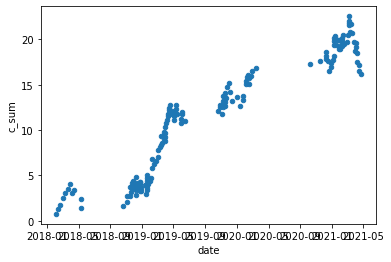

In [234]:
data.plot(x='date',y='c_sum',kind='scatter')

<AxesSubplot:>

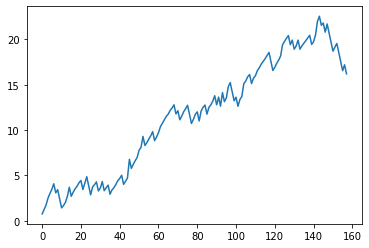

In [212]:
data['c_sum'].plot()

<AxesSubplot:>

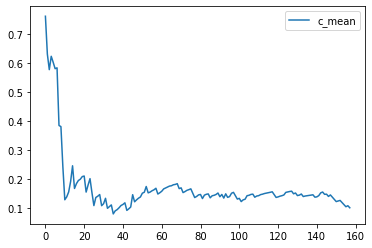

In [338]:
data[:].plot(y='c_mean')

## Hypothesis testing

### Is the mean in period 4 significantly lower?

In [10]:
period_123 = data[data['period']!=4]['result']
period_4 = data[data['period']==4]['result']

In [11]:
pop_mean = period_123.mean()
sample_mean = period_4.mean()

std_er = st.sem(period_123)

CL = 0.95 #One-sided   !!!!!!!!!!!!!!0.99!!!!!!!!!!!!!
zc = scipy.stats.norm.ppf(CL)
z = (sample_mean-pop_mean)/(std_er)

if np.abs(z)>np.abs(zc):
    print('The mean in period 4 is significantly lower (with 99% CL). Z = {:.4} and Zc = {:.3}'.format(z,zc))
else:
    print("The mean in period 4 isn't significantly lower (with 99% CL). Z = {:.3} and Zc = {:.3}".format(z,zc))

The mean in period 4 is significantly lower (with 99% CL). Z = -2.488 and Zc = 1.64


In [287]:
st.sem(period_123)

0.0626839292664719

In [288]:
st.sem(period_4)

0.13007102760500597

### Testing in period 1, 2 and 3

In [314]:
data_123 = data[data['period']!=4]

#### Period 1

In [318]:
period_123_23 = data_123[data_123['period']!=1]['result']
period_123_1 = data_123[data_123['period']==1]['result']

In [344]:
pop_mean = period_123_23.mean()
sample_mean = period_123_1.mean()

std_er = st.sem(period_123_23)

CL = 0.95 #One-sided
zc = scipy.stats.t.ppf(CL,df=len(period_123_1)-1)  # n = 11
z = (sample_mean-pop_mean)/(std_er)

if np.abs(z)>np.abs(zc):
    print('The mean in period 4 is significantly lower (with 99% CL). Z = {:.4} and Zc = {:.3}'.format(z,zc))
else:
    print("The mean in period 4 isn't significantly lower (with 99% CL). Z = {:.3} and Zc = {:.3}".format(z,zc))

The mean in period 4 isn't significantly lower (with 99% CL). Z = -0.307 and Zc = 1.81


#### Period 2

In [321]:
period_123_13 = data_123[data_123['period']!=2]['result']
period_123_2 = data_123[data_123['period']==2]['result']

In [324]:
pop_mean = period_123_13.mean()
sample_mean = period_123_2.mean()

std_er = st.sem(period_123_13)

CL = 0.95 #One-sided  
zc = scipy.stats.norm.ppf(CL)   # n = 71
z = (sample_mean-pop_mean)/(std_er)

if np.abs(z)>np.abs(zc):
    print('The mean in period 4 is significantly lower (with 99% CL). Z = {:.4} and Zc = {:.3}'.format(z,zc))
else:
    print("The mean in period 4 isn't significantly lower (with 99% CL). Z = {:.3} and Zc = {:.3}".format(z,zc))

The mean in period 4 isn't significantly lower (with 99% CL). Z = -0.33 and Zc = 1.64


#### Period 3

In [307]:
period_123_12 = data_123[data_123['period']!=3]['result']
period_123_3 = data_123[data_123['period']==3]['result']

In [328]:
pop_mean = period_123_12.mean()
sample_mean = period_123_3.mean()

std_er = st.sem(period_123_12)

CL = 0.95 #One-sided
zc = scipy.stats.norm.ppf(CL)      # n = 31
z = (sample_mean-pop_mean)/(std_er)

if np.abs(z)>np.abs(zc):
    print('The mean in period 4 is significantly lower (with 99% CL). Z = {:.4} and Zc = {:.3}'.format(z,zc))
else:
    print("The mean in period 4 isn't significantly lower (with 99% CL). Z = {:.3} and Zc = {:.3}".format(z,zc))

The mean in period 4 isn't significantly lower (with 99% CL). Z = 0.739 and Zc = 1.64


# Saving data

In [348]:
data.to_csv('./data/data_cl.csv')